<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#посмотрим типы данных и кол-во ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
display (data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Описание данных
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Вывод

Проанализировав данные можно сделать соответсвующие выводы:
* 1) first_day_exposition - object - должен быть тип datetime
* 2) ceiling_height - нулевые значения
* 3) floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
* 4) is_apartment - должен быть тип bool + нулевые значения
* 5) living_area - нулевые значения
* 6) kitchen_area - нулевые значения
* 7) balcony - нулевые значения
* 8) locality_name - нулевые значения
* 9) airports_nearest - нулевые значения
* 10) cityCenters_nearest - нулевые значения
* 11) parks_around3000 - тип должен быть int + нулевые значения
* 12) parks_nearest - нулевые значения
* 13) ponds_around3000 - тип должен быть int + нулевые значения
* 14) ponds_nearest - нулевые значения
* 15) days_exposition - тип должен быть int + нулевые значения

## Предобработка данных

In [3]:
#Основываясь на выводы из предыдущего пункта приступим к предобработке данных необходимых пунктов
#1) переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


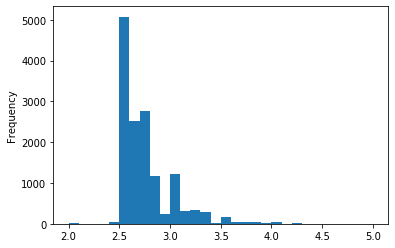

In [4]:
#посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть,
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)

In [5]:
#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
# в дальнейшем будет применена группировка
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [6]:
#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
#living_area слишком много знаков после запятой и есть пропущенные значения, 
#можно посчитать средний процент жилой площади от всей площади по всей выборке
#и высчитать для строк с пропусками жилую площадь как вариант, но мы поступим иначе и проще
data['living_area'].value_counts()
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [8]:
#пропущенные значения в locality_name не будем трогать, причина не понятна
data['locality_name'].value_counts()

Санкт-Петербург             15721
посёлок Мурино                522
посёлок Шушары                440
Всеволожск                    398
Пушкин                        369
                            ...  
деревня Котлы                   1
поселок Гаврилово               1
деревня Старое Хинколово        1
посёлок Высокоключевой          1
посёлок Петро-Славянка          1
Name: locality_name, Length: 364, dtype: int64

In [9]:
#заменим пропуски в balcony на 0 и изменим тип данных на int
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [10]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [11]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [12]:
#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


In [13]:
# функция, получающая на вход название признака, и возвращающая число пропущенных значений
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().value_counts()[1] / len(data), 2) + ' значений')

In [14]:
print_nan_ratio('ceiling_height')
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

Пропущено 38.8% значений


,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [15]:
# заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]

In [16]:
# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

In [17]:
# посчитаем количество пропущенных значений после проделанной замены
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

In [18]:
# посчитаем количество пропущенных значений 
print_nan_ratio('floors_total')
data.dropna(subset=['floors_total'], inplace=True)

Пропущено 0.4% значений


In [19]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int')

In [20]:
print_nan_ratio('locality_name')
data.dropna(subset=['locality_name'], inplace=True)

Пропущено 0.2% значений


In [21]:
data['locality_name'] = data['locality_name'].fillna('NaN')

## Расчёты и добавление результатов в таблицу

Необходимо подсчитать и добавить в таблицу такие параметры как:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [22]:
#посчитаем цену квадратного метра и приведем его к типо int
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [23]:
#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

In [24]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

In [25]:
#добавим столбец соотношения жилой плозади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

**Проведем исследовательский анализ данных.**

**1) Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.**

In [26]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.735737
std,35.657060,1.091093e+07,1.078591,0.996999
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


**Предварительный анализ дал следующее:**

по площади есть как квартира 12 кв.м., так и 900 кв.м. Но среднее значение выглядит более здравым;
по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн, любой покупатель найдет свой вариант;
число комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения;
высота потолков - от 1 до 100 метров.

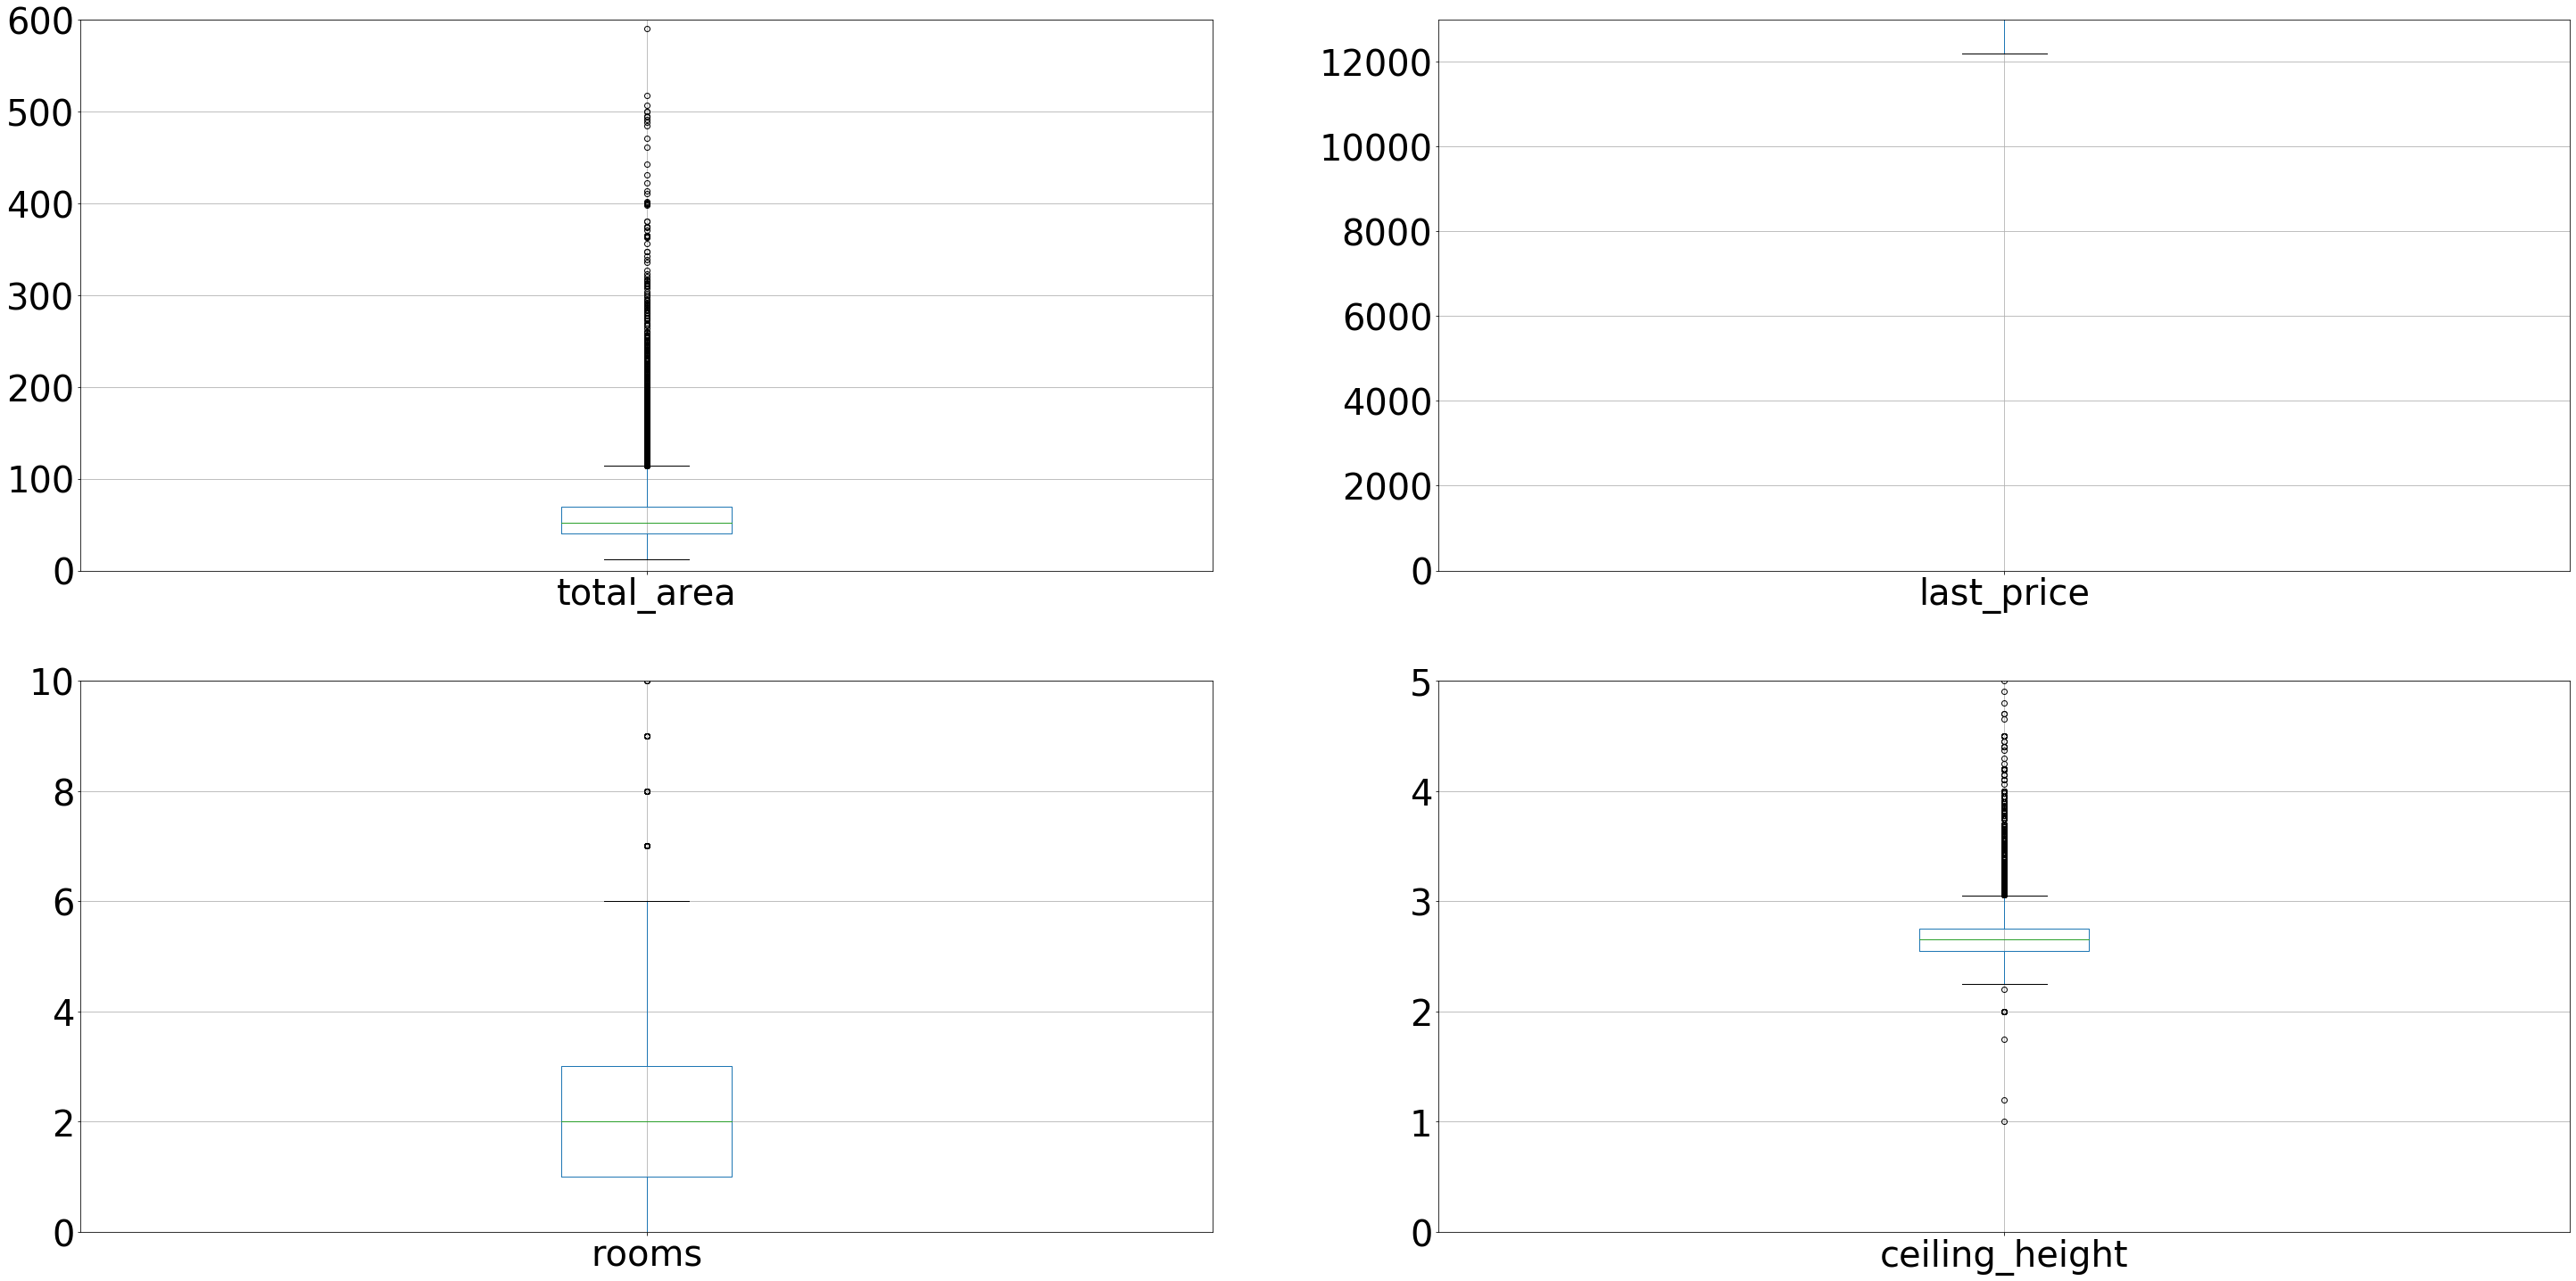

In [27]:
#определим выбросы по каждому из набора данных
import matplotlib.pyplot as plt
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

**Определяем границы:**

- total_area - 20-120 кв.м.;
- last_price - 0-12 млн р.;
- rooms - 0-6 комнат;
- ceiling_height - 2,4-3,25м.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

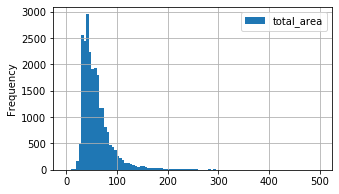

In [28]:
#Изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
#распределение данных в целом нормальное, есть некторые выбросы, но они в целом не портят общую картину

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

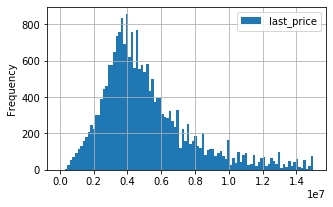

In [29]:
#Изучим цену
#data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()
#с данными все впорядке, но значения выводятся в экспоненциальной записи чисел
# сейчас бы такие цены в Москве)

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

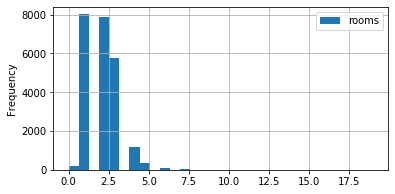

In [30]:
#Изучим число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (6,3))
data['rooms'].describe()
#с данными все впорядке

count    23565.000000
mean         2.735737
std          0.996999
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

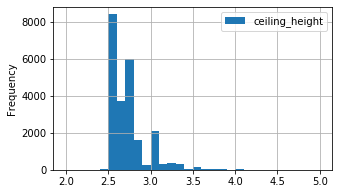

In [31]:
#Изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
#с данными все впорядке

**Вывод 1**
* 1) Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.

* 2) Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

* 3) Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

* 4) Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

Во всех данных есть неадекватные значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12190 рублей. О данных неадекватных значениях мы спросим у сотрудников, предоставивших нам выборку данных, для общего изучения данных, мы не станем убирать эти выбивающиеся значения.

<div class="alert alert-success">
<b>✅ Комментарий ревьюера:</b> 

- С оценкой параметров согласен
- Основные диапазоны выделены корректно
- Гистограммы прочитаны верно
</div>

**Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

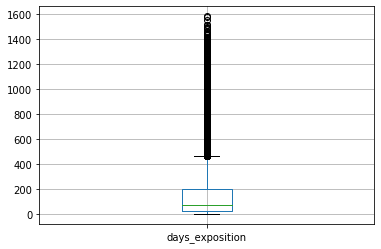

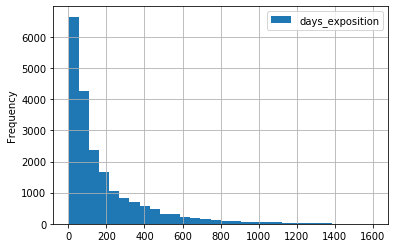

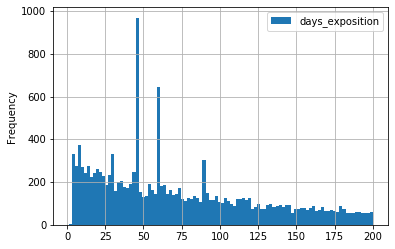

In [32]:
#диаграмма размаха
data.boxplot(column='days_exposition')

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

**Вывод** 

Судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

*Согласно правилам размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически. https://yandex.ru/support/realty/owner/home/add-ads-housing.html Наверное, нам нужно убрать эти значения из выборки, но нужно подумать есть ли еще критерии для снятия таких объявлений, ведь часть из таких квартир могла и правда продаться в этот срок.*

In [33]:
data[data['days_exposition']==45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
78,9,4350000,37.0,2018-02-22,1,2.75,19,18.0,6,False,...,0.0,NaN,45,117567,3,2,2018,другой,0.486486,0.289189
89,9,2500000,63.0,2018-10-25,3,2.50,5,43.0,4,False,...,NaN,NaN,45,39682,3,10,2018,другой,0.682540,0.142857
110,6,3850000,72.3,2017-09-29,2,2.80,3,27.4,2,False,...,NaN,NaN,45,53250,4,9,2017,другой,0.378976,0.326418
153,12,4350000,55.0,2017-05-21,2,2.57,9,31.2,2,False,...,0.0,NaN,45,79090,6,5,2017,другой,0.567273,0.150909
158,15,3100000,47.3,2017-11-07,2,2.55,5,27.5,2,False,...,NaN,NaN,45,65539,1,11,2017,другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,2.55,5,NaN,1,False,...,2.0,397.0,45,66820,3,1,2018,первый,NaN,NaN
23613,4,3950000,52.0,2018-03-04,3,2.55,5,NaN,2,False,...,0.0,NaN,45,75961,6,3,2018,другой,NaN,NaN
23670,9,2450000,45.6,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,NaN,45,53728,3,2,2018,другой,NaN,NaN
23679,0,2500000,35.0,2017-12-08,1,2.55,9,NaN,4,False,...,NaN,NaN,45,71428,4,12,2017,другой,NaN,NaN


**Вывод**

Никаких общих особенностей в обьявлениях, снятых через 45 дней не выявлено, потому будем убирать эти данные из наших расчетов, как и данные с 60, 90, 30 и 7 дней в столбце days_exposition, так как это аномалии.

До того, как мы очистим наши данные от аномалий, нам нужно дать ответ на вопрос, какое количество дней считать нормальным, а какое выбросом на текущий момент до очистки данных. Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.

На текущий момент мы уже знаем, что эти данные неправильные, но они нам нужны, чтобы сравнить с данными, очищенными от аномалий далее.

**Теперь необходимо убрать редкие и выбивающиеся значения. Нужно описать, какие особенности обнаружили.**

In [34]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7')

- good_data = good_data[good_data['total_area'] >= 20]
- good_data = good_data[good_data['total_area'] <= 120]
- good_data = good_data[good_data['last_price'] <= 12000]
- good_data = good_data[good_data['rooms'] <= 6]
- good_data = good_data[good_data['ceiling_height'] >= 2.4]
- good_data = good_data[good_data['ceiling_height'] <= 3.25]

(1, 1000)

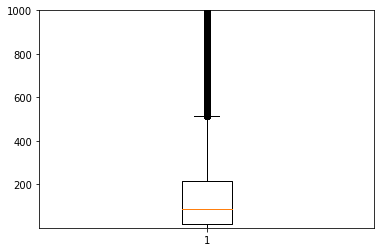

In [35]:
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

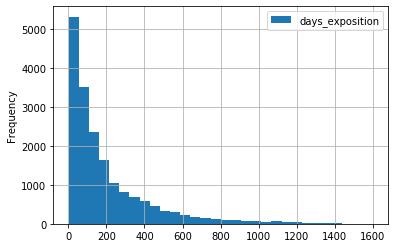

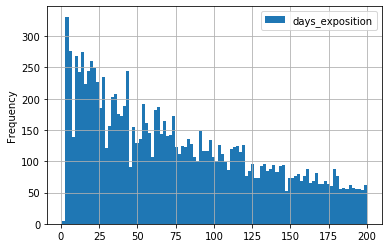

In [36]:
#гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [37]:
#среднее значение, медиана и межквартильный размах
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

count    21506.000000
mean       166.852367
std        220.606491
min          0.000000
25%         20.000000
50%         86.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**
Что и следовало ожидать, в очищенных данных с аномалиями в значениях меньших медианы получаем меньшие значения медианы и среднего значения - 86 и 167 соответственно, вместо 95 и 180. Также теперь нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.

**Далее нам необходимо ответить на вопрос:** *Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.*

**Изучим зависимость цены квадратного метра от общей площади квартиры.**

0.3025705855894221

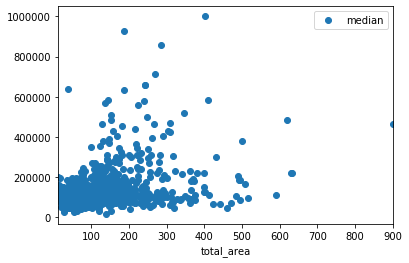

In [38]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_per_square_meter'])

**Вывод** 
Можно увидеть, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! То есть, чем больше площадь тем немного выше стоимость! И действительно большая площадь, это не гарантия того, что недвижимость должна стоить дороже, есть куда больше ключевых факторов.

**Изучим зависимость цены квадратного метра от числа комнат.**

0.055679781492603664

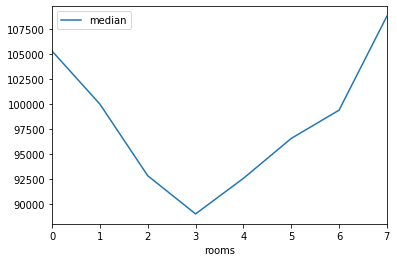

In [39]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_per_square_meter'])

**Вывод** чем ближе количество комнат к 3, тем ниже стоимость квадратного метра.

**Изучим зависимость цены квадратного метра от этажа (первого или последнего).**

,mean,count,median
floor_category,,,
первый,82001.162943,2909,81250
последний,93378.509009,3330,87763


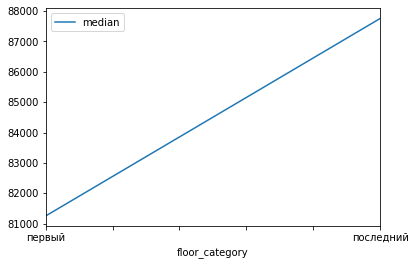

In [40]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

**Вывод** В целом ожидаемо. что квартиры на первых этажах стоят дешевле, однако насколько я сам сталкивался тоже самое касается и квартир на последних этажах =(

**Изучим зависимость цены квадратного метра от удалённости от центра.**

-0.31759628115540994

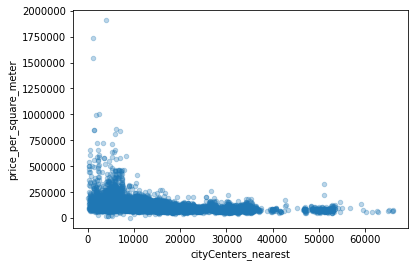

In [41]:
data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['price_per_square_meter'])

**Вывод** Видим явную зависимость стоимости квадратного метра от близости к центру! Чем ближе к центру, тем выше стоимость!

**Изучим зависимость цены квадратного метра от даты размещения: дня недели.**

,mean,count,median
weekday_exposition,,,
1,99667.761951,4163,95567.0
2,99584.276596,3948,95473.0
3,100194.284144,4276,95132.0
0,99462.125139,3596,94719.0
6,97758.773024,1683,94594.0
4,98924.551005,3980,94579.5
5,99045.405941,1919,93548.0


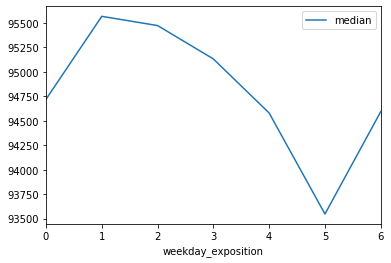

In [42]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод** Мы видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены. Рост цены возможно связан со спросом, то есть во вторник просто больше людей рассматривает себе жилье.

**Изучим зависимость цены квадратного метра от даты размещения: месяца.**

,mean,count,median
month_exposition,,,
4,101987.648557,2356,96543.0
8,100108.687752,1739,96052.0
9,100518.872211,1972,95623.0
11,99228.002542,2360,95606.5
3,98951.544078,2575,95233.0
1,99732.675857,1487,95180.0
7,99612.893238,1686,95005.5
2,98762.248483,2636,95000.0
12,99501.177656,1638,94238.0


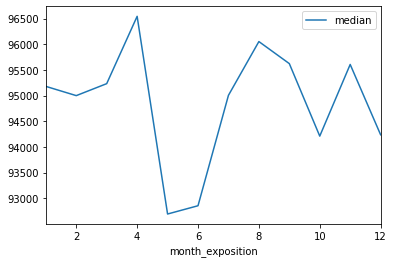

In [43]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**Вывод** Самая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками, сдачей жилья в аренду в сезоны отпусков.

**Изучим зависимость цены квадратного метра от даты размещения: года.**

,mean,count,median
year_exposition,,,
2014,124301.926471,136,106901.5
2019,107046.819923,2871,103199.0
2018,97762.264318,8486,95695.5
2015,104639.883362,1166,93364.5
2017,97637.679819,8161,92569.0
2016,98291.356648,2745,91743.0


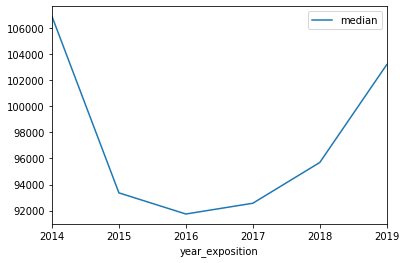

In [44]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод** Мы видим что цена за метр падала вплоть до 2016 года, однако потом она возрасла. Это может быть связано с разными факторами: экономическая обстановка в стране, санкции, увеличение стоимости материалов и затрат на оплату строителям, спрос/предложение.

In [45]:
pivot_table_weekday_exposition.corr()
#По итогу неделя имеет большую значимость

,mean,count,median
mean,1.000000,0.796972,0.464323
count,0.796972,1.000000,0.737041
median,0.464323,0.737041,1.000000


In [46]:
pivot_table_month_exposition.corr()

,mean,count,median
mean,1.000000,0.107320,0.790064
count,0.107320,1.000000,0.504426
median,0.790064,0.504426,1.000000


In [47]:
pivot_table_year_exposition.corr()

,mean,count,median
mean,1.000000,-0.714412,0.872762
count,-0.714412,1.000000,-0.469261
median,0.872762,-0.469261,1.000000


**Далее нам необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.**

In [48]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.433902
посёлок Мурино,520,85672.803846
посёлок Шушары,439,78550.883827
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [49]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.433902


In [50]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


**Вывод** Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

**Далее нам нужно изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр. Нужно создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.**

,price_per_square_meter
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129526.480916
4,137412.971207
5,146977.869792
6,152277.455319
7,141399.287469
8,120538.701649


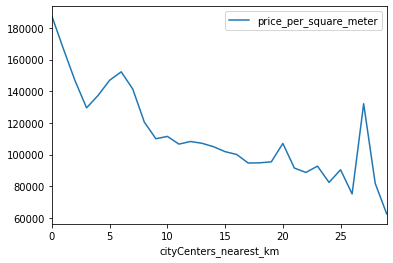

In [51]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

**Вывод** Судя по графику центром можно считать радиус в 3 км? Или же все-таки 6...

**Дальше нам нужно выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?**

In [52]:
#выделим квартиры в центре, беря за радиус 6 км
center_spb_data = data.query('cityCenters_nearest_km <= 6 and locality_name == "Санкт-Петербург"')

**Найдем зависимость стоимости квадратного метра от количества комнат.**

-0.009653704313327979

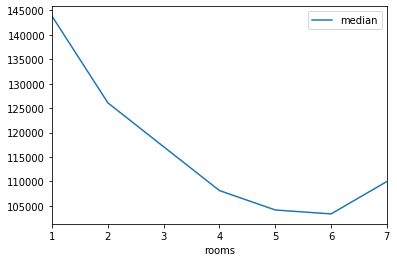

In [53]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

**Вывод**
Если смотреть на график, то можно сделать вывод, что в центре СПБ чем меньше комнат, тем дороже стоимость метра квадратного, в отличие от всей выборки, где стоимость уменьшается в зависимости от близости кол-ва комнат к 3! Хотя коэффициент корреляции довольно мал, это значит зависимость хоть и есть, но она маленькая.

**Найдем зависимость стоимости квадратного метра от этажа.**

,mean,count,median
floor_category,,,
первый,122682.506739,371,109457
последний,144071.772803,603,116666


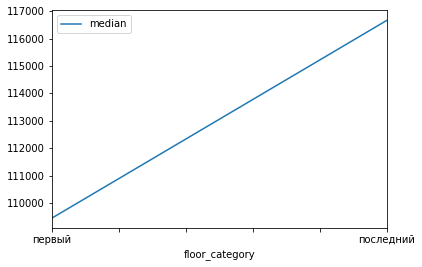

In [54]:
center_spb_floor_category = center_spb_data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

**Вывод** Аналогичная ситуация, как и в общей выборке. Вопрос тот же самый =)

**Найдем зависимость стоимости квадратного метра от удаленности от центра.**

-0.029761479222545652

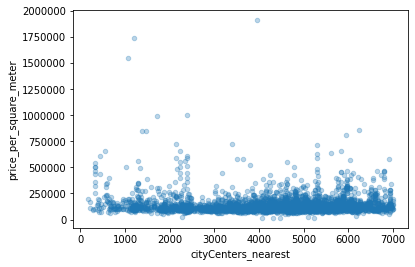

In [55]:
center_spb_data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_per_square_meter'])

**Вывод** довольно сложно сделать вывод исходя из того, что уже произведены выборка по квартирам в центре города, тут больше видно, что колличество объявлений в меньшей отдаленности от центра гораздо меньше, чем те что дальше от центра)

**Найдем зависимость стоимости квадратного метра от дня недели размещения объявления.**

,mean,count,median
weekday_exposition,,,
6,147687.586592,179,129032.0
5,155971.818565,237,128703.0
0,144265.019608,510,126325.0
4,143709.511712,555,125000.0
2,142758.117747,586,124586.5
3,145018.539706,680,120556.0
1,142506.332123,551,118397.0


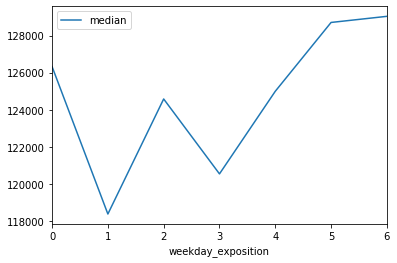

In [56]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

**Вывод** Ситуация отличается от обзей выборки, минимальные средние цены в четверг и воскресенье, самые высокие - в понедельник и субботу!

**Найдем зависимость стоимости квадратного метра от месяца размещения объявления.**

,mean,count,median
month_exposition,,,
3,147665.441595,351,130333.0
1,147891.754902,204,129334.5
4,156068.268608,309,127574.0
8,145941.605042,238,125000.0
9,146258.156250,288,124051.5
11,142552.432024,331,123222.0
10,140554.277778,270,122935.0
5,135036.109290,183,122077.0
12,149975.766234,231,121328.0


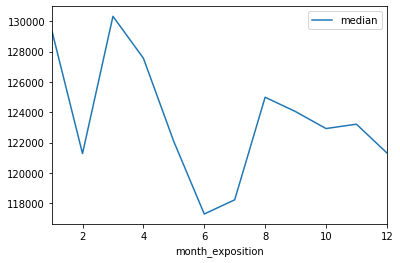

In [57]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

**Вывод** Ситуация похожая с общей выборкой - самая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! Причина может быть таже самая - сезонность.

**Найдем зависимость стоимости квадратного метра от года размещения объявления.**

,mean,count,median
year_exposition,,,
2014,195653.962963,27,143465
2019,162791.278873,355,136363
2018,141058.674419,989,124750
2017,143189.413764,1177,121136
2015,147424.363636,297,119568
2016,138246.412804,453,115705


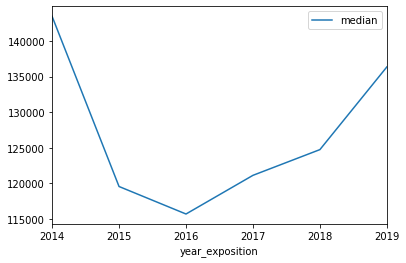

In [58]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.plot(y = 'median')

center_spb_year_exposition.sort_values('median', ascending = False)

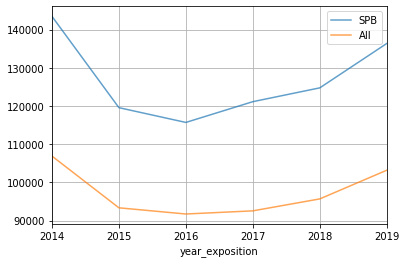

In [59]:
spb_pivot_table_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])

spb_pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
ax = spb_pivot_table_year_exposition.plot(
    y='median',
    alpha=0.7,
    label='SPB'
)
pivot_table_year_exposition.plot(
    y='median',
    alpha=0.7,
    label='All',
    ax = ax,
    grid=True,
    legend=True,
)

**Вывод** В отличие от общей выборки мы видим, что цена с 2014 по 2015 год существенно упала, ну и сама разница в цене. Поведение в целлом общее.

## Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 3 км в центре СПБ.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод